In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [131]:
def diltion(src_img, struct_el):
    output = np.copy(src_img)
    struct_el_center_i = math.floor(struct_el.shape[0]/2)
    struct_el_center_j = math.floor(struct_el.shape[1]/2)


    # iterate over the image 
    for i in range(len(src_img)):
        for j in range(len(src_img[i])):
            if src_img[i][j] == 1 and i > struct_el_center_i and j > struct_el_center_j:
                portion_of_output = output[i-struct_el_center_i:i+struct_el_center_i+1, j-struct_el_center_j:j+struct_el_center_j+1]

                # Update a portion of the original image based on the structure element
                for k in range(portion_of_output.shape[0]):
                    for l in range(portion_of_output.shape[1]):
                        if portion_of_output[k][l] == 0:
                            portion_of_output[k][l] = struct_el[k][l]
    
    return output

In [161]:
def erosion(src_img, struct_el):
    output = np.zeros(shape=src_img.shape)
    struct_el_center_i = math.floor(struct_el.shape[0]/2)
    struct_el_center_j = math.floor(struct_el.shape[1]/2)


    # iterate over the image 
    for i in range(len(src_img)):
        for j in range(len(src_img[i])):
            if src_img[i][j] == 1 and i > struct_el_center_i and j > struct_el_center_j:
                portion_of_output = src_img[i-struct_el_center_i:i+struct_el_center_i+1, j-struct_el_center_j:j+struct_el_center_j+1]

                if np.array_equal(portion_of_output, struct_el):
                    output[i][j] = 1
    
    return output

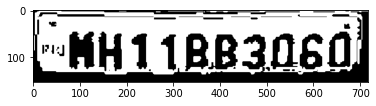

In [164]:
im = cv2.imread('binary_image.png', cv2.IMREAD_GRAYSCALE)
im = im/255
plt.imshow(im, cmap='gray')
im = 1 - im


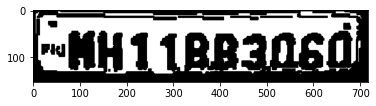

In [134]:
kernel = np.ones((5,5), np.uint8)

# kernel2 = np.array([
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
#     [1, 1, 1, 1, 1],
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
# ], dtype=np.uint8)

# struct_el = np.array([
#     [1, 1, 0, 1, 1],
#     [1, 0, 0, 0, 1],
#     [0, 0, 0, 0, 0],
#     [1, 0, 0, 0, 1],
#     [1, 1, 0, 1, 1],
# ])

img_dilation = cv2.dilate(im, kernel, iterations=1)


img_dilation = 1 - img_dilation
plt.imshow(img_dilation, cmap='gray')

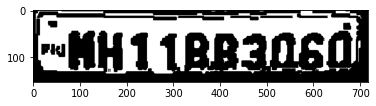

In [135]:
# struct_el = np.array([
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
#     [1, 1, 1, 1, 1],
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
# ])

struct_el = np.array([
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
])

# struct_el = np.ones(shape=(5,5), dtype=int)
output_im = diltion(im, struct_el)

output_im = 1 - output_im
plt.imshow(output_im, cmap='gray')

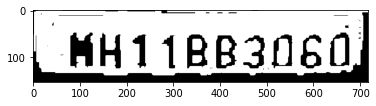

In [172]:

kernel = np.ones((5,5), np.uint8)

# kernel2 = np.array([
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
#     [1, 1, 1, 1, 1],
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
# ], dtype=np.uint8)

# struct_el = np.array([
#     [1, 1, 0, 1, 1],
#     [1, 0, 0, 0, 1],
#     [0, 0, 0, 0, 0],
#     [1, 0, 0, 0, 1],
#     [1, 1, 0, 1, 1],
# ])

img_dilation = cv2.erode(im, kernel, iterations=1)


img_dilation = 1 - img_dilation
plt.imshow(img_dilation, cmap='gray')

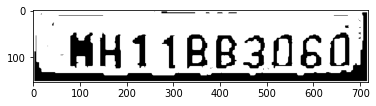

In [173]:
# Erosion

# struct_el = np.array([
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
#     [1, 1, 1, 1, 1],
#     [0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0],
# ])

# struct_el = np.array([
#     [1, 1, 0, 1, 1],
#     [1, 0, 0, 0, 1],
#     [0, 0, 0, 0, 0],
#     [1, 0, 0, 0, 1],
#     [1, 1, 0, 1, 1],
# ])

struct_el = np.ones(shape=(5, 5), dtype=int)
output_im = erosion(im, struct_el)

output_im = 1 - output_im
plt.imshow(output_im, cmap='gray')